<a href="https://colab.research.google.com/github/mannmoshe/deep-learning/blob/main/medicine_imaging_project/medicine_imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import shutil
import pathlib
import imageio
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.12.0'

create directories

In [4]:
!mkdir train
!mkdir validation
!mkdir test

create subdirectories for each class

In [5]:
!mkdir train/01
!mkdir train/02
!mkdir train/03

!mkdir validation/01
!mkdir validation/02
!mkdir validation/03

!mkdir test/01
!mkdir test/02
!mkdir test/03

In [6]:
class1_path = '/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data/01/'
class2_path = '/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data/02/'
class3_path = '/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging/data/03/'

In [7]:
class1_files = os.listdir(class1_path)
class2_files = os.listdir(class2_path)
class3_files = os.listdir(class3_path)

In [8]:
class1_files_sorted = sorted([x for x in class1_files])
class2_files_sorted = sorted([x for x in class2_files])
class3_files_sorted = sorted([x for x in class3_files])

In [9]:
class1_files_sorted[:5]

['01.jpeg', '010.jpeg', '011.jpeg', '012.jpeg', '013.jpeg']

In [10]:
print(len(class1_files_sorted), len(class2_files_sorted), len(class3_files_sorted))

70 70 111


split class 1 to train, validation and test

In [11]:
for f in class1_files_sorted[:35]:
  src = os.path.join(class1_path, f)
  dst = os.path.join('/content/train/01/', f)
  shutil.copyfile(src, dst)

In [12]:
for f in class1_files_sorted[35:53]:
  src = os.path.join(class1_path, f)
  dst = os.path.join('/content/validation/01/', f)
  shutil.copyfile(src, dst)

In [13]:
for f in class1_files_sorted[53:]:
  src = os.path.join(class1_path, f)
  dst = os.path.join('/content/test/01/', f)
  shutil.copyfile(src, dst)

split class 2 to train, validation and test

In [14]:
for f in class2_files_sorted[:35]:
  src = os.path.join(class2_path, f)
  dst = os.path.join('/content/train/02/', f)
  shutil.copyfile(src, dst)

In [15]:
for f in class2_files_sorted[35:53]:
  src = os.path.join(class2_path, f)
  dst = os.path.join('/content/validation/02/', f)
  shutil.copyfile(src, dst)

In [16]:
for f in class2_files_sorted[53:]:
  src = os.path.join(class2_path, f)
  dst = os.path.join('/content/test/02/', f)
  shutil.copyfile(src, dst)

split class 3 to train, validation and test

In [17]:
for f in class3_files_sorted[:30]:
  src = os.path.join(class3_path, f)
  dst = os.path.join('/content/train/03/', f)
  shutil.copyfile(src, dst)

In [18]:
for f in class3_files_sorted[30:44]:
  src = os.path.join(class3_path, f)
  dst = os.path.join('/content/validation/03/', f)
  shutil.copyfile(src, dst)

In [19]:
for f in class3_files_sorted[53:70]:
  src = os.path.join(class3_path, f)
  dst = os.path.join('/content/test/03/', f)
  shutil.copyfile(src, dst)

In [20]:
print(len(os.listdir('/content/train/01/')), len(os.listdir('/content/train/02/')), len(os.listdir('/content/train/03/')))

35 35 30


In [21]:
print(len(os.listdir('/content/validation/01/')), len(os.listdir('/content/validation/02/')), len(os.listdir('/content/validation/03/')))

18 18 14


In [22]:
print(len(os.listdir('/content/test/01/')), len(os.listdir('/content/test/02/')), len(os.listdir('/content/test/03/')))

17 17 17


Build network

In [30]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [32]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [33]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/train/',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/validation/',
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

Found 100 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [34]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 3)


In [35]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5)

<ipython-input-35-2883d3b95d37>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
10/10 [==============================] - 17s 2s/step - loss: 1.1213 - acc: 0.3500 - val_loss: 1.0220 - val_acc: 0.3600
Epoch 2/30
10/10 [==============================] - 15s 1s/step - loss: 1.0014 - acc: 0.4600 - val_loss: 0.9166 - val_acc: 0.7400
Epoch 3/30
10/10 [==============================] - 16s 2s/step - loss: 0.9114 - acc: 0.6200 - val_loss: 0.8126 - val_acc: 0.7400
Epoch 4/30
10/10 [==============================] - 18s 2s/step - loss: 0.7640 - acc: 0.7500 - val_loss: 0.6698 - val_acc: 0.7000
Epoch 5/30
10/10 [==============================] - 15s 1s/step - loss: 0.5980 - acc: 0.8300 - val_loss: 0.6224 - val_acc: 0.7600
Epoch 6/30
10/10 [==============================] - 22s 2s/step - loss: 0.4896 - acc: 0.8700 - val_loss: 0.6736 - val_acc: 0.7000
Epoch 7/30
10/10 [==============================] - 18s 2s/step - loss: 0.4407 - acc: 0.8700 - val_loss: 0.6852 - val_acc: 0.7000
Epoch 8/30
10/10 [==============================] - 18s 2s/step - loss: 0.2851 - acc: 0.92

In [36]:
model.save('imaging_classification.h5')

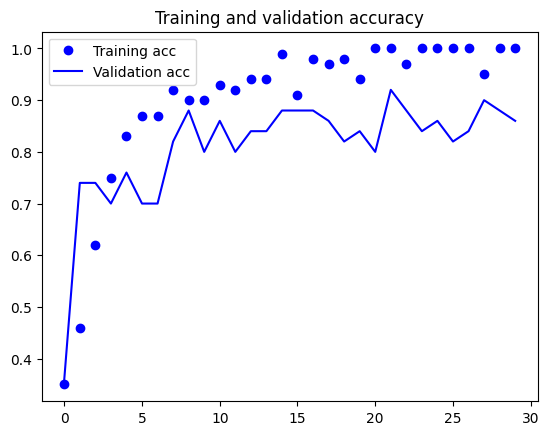

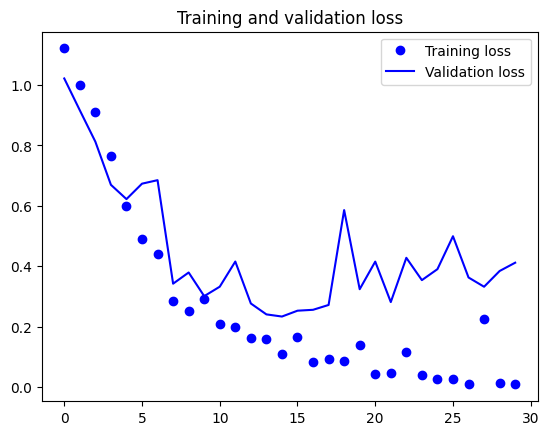

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()